In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uber_15 = pd.read_csv(r'C:\Users\Lenovo\Desktop\all Dataset for analysis\Uber Data analysis\data/uber-raw-data-janjune-15.csv')

In [4]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [5]:
uber_15.duplicated().sum()

898225

In [6]:
uber_15.drop_duplicates(inplace=True)

In [7]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [8]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'], format='%Y-%m-%dT%H:%M:%S')

In [9]:
uber_15['Pickup_date'].dtypes

dtype('<M8[ns]')

In [10]:
uber_15['month'] = uber_15['Pickup_date'].dt.month

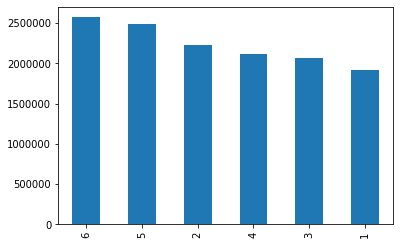

In [14]:
uber_15['month'].value_counts().plot(kind='bar')